# 01. **Import libraries**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report
from sklearn.cluster import KMeans



# **02. Load Data Set**

In [ ]:
df = pd.read_csv('/content/MentalHealthSurvey.csv')
print(df.head())

   gender  age university   degree_level      degree_major academic_year  \
0    Male   20         PU  Undergraduate      Data Science      2nd year   
1    Male   20        UET   Postgraduate  Computer Science      3rd year   
2    Male   20       FAST  Undergraduate  Computer Science      3rd year   
3    Male   20        UET  Undergraduate  Computer Science      3rd year   
4  Female   20        UET  Undergraduate  Computer Science      3rd year   

      cgpa residential_status campus_discrimination sports_engagement  ...  \
0  3.0-3.5         Off-Campus                    No         No Sports  ...   
1  3.0-3.5         Off-Campus                    No         1-3 times  ...   
2  2.5-3.0         Off-Campus                    No         1-3 times  ...   
3  2.5-3.0          On-Campus                    No         No Sports  ...   
4  3.0-3.5         Off-Campus                   Yes         No Sports  ...   

  study_satisfaction  academic_workload   academic_pressure  \
0          

# **03. Handle Mising Data**

In [ ]:
print(df.isnull().sum())
df['average_sleep'] = df['average_sleep'].replace({'2-4 hrs': 3, '4-6 hrs': 5, '7-8 hrs': 7.5})
df['average_sleep'].fillna(df['average_sleep'].mean(),inplace=True)
df['study_satisfaction'].fillna(df['study_satisfaction'].mode()[0],inplace=True)


gender                      0
age                         0
university                  0
degree_level                0
degree_major                0
academic_year               0
cgpa                        0
residential_status          0
campus_discrimination       0
sports_engagement           0
average_sleep               0
study_satisfaction          0
academic_workload           0
academic_pressure           0
financial_concerns          0
social_relationships        0
depression                  0
anxiety                     0
isolation                   0
future_insecurity           0
stress_relief_activities    0
dtype: int64


# **04. Feature Engineering**

Covert Categorical columns using One-Hot Encoding

In [ ]:
df = pd.get_dummies(df, columns=['gender', 'university', 'degree_level', 'degree_major', 'residential_status'], drop_first=True)
print('columns in after encoding: ', df.columns.tolist())
df.rename(columns={'academic_workload ': 'academic_workload'}, inplace=True)
df['workload_study_interaction'] = df['academic_workload'] * df['study_satisfaction']

columns in after encoding:  ['age', 'academic_year', 'cgpa', 'campus_discrimination', 'sports_engagement', 'average_sleep', 'study_satisfaction', 'academic_workload ', 'academic_pressure', 'financial_concerns', 'social_relationships', 'depression', 'anxiety', 'isolation', 'future_insecurity', 'stress_relief_activities', 'gender_Male', 'university_FAST', 'university_KUST', 'university_NUST', 'university_PU', 'university_UET', 'university_UMT', 'university_UOL', 'university_VU', 'degree_level_Undergraduate', 'degree_major_Data Science', 'degree_major_Information Technology', 'degree_major_Software Engineering', 'residential_status_On-Campus']


# **05. Discriptive statistics using Pandas**

In [ ]:
print(df.describe())
numeric_df = df.select_dtypes(include = [np.number])
correlation_metrics = numeric_df.corr()
print(correlation_metrics)

             age  average_sleep  study_satisfaction  academic_workload  \
count  87.000000      87.000000           87.000000          87.000000   
mean   19.942529       5.804598            3.931034           3.885057   
std     1.623636       1.379578            1.043174           0.854880   
min    17.000000       3.000000            1.000000           2.000000   
25%    19.000000       5.000000            3.000000           3.000000   
50%    20.000000       5.000000            4.000000           4.000000   
75%    21.000000       7.500000            5.000000           4.500000   
max    26.000000       7.500000            5.000000           5.000000   

       academic_pressure  financial_concerns  social_relationships  \
count          87.000000           87.000000             87.000000   
mean            3.781609            3.390805              2.781609   
std             1.125035            1.400634              1.175578   
min             1.000000            1.000000         

# **06. MatPlot and Seaborn Visualization**

# 06.1 Colleration Heat Map

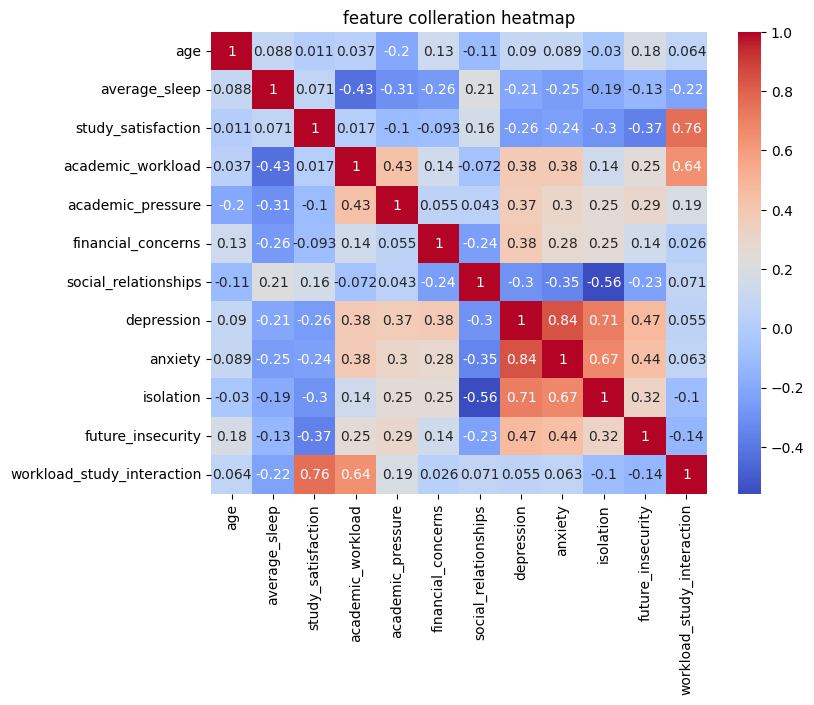

In [ ]:
#correlation Heat Map
plt.figure(figsize = (8,6))
sns.heatmap(correlation_metrics, annot = True, cmap = 'coolwarm')
plt.title('feature colleration heatmap')
plt.show()

   # 06.2 Ditribution of Numerical figure (cgpa)

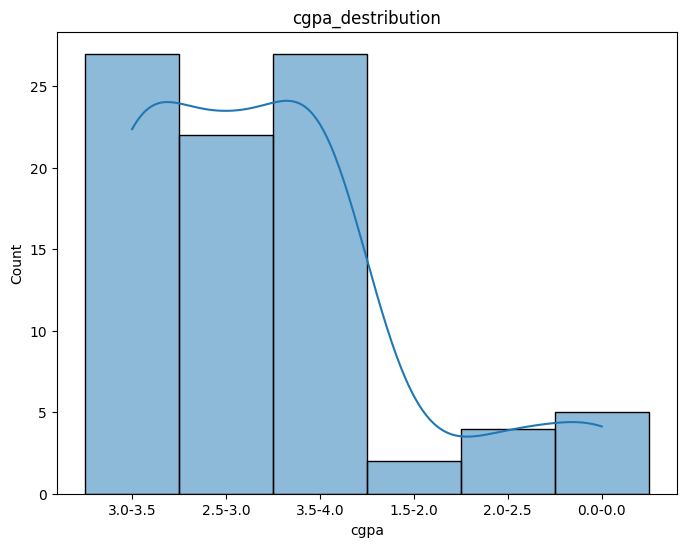

In [ ]:
plt.figure(figsize = (8,6))
sns.histplot(df['cgpa'],kde = True)
plt.title('cgpa_destribution')
plt.show()


  # 06.3 Bar Plot of Categorical features (Sport Engagement)

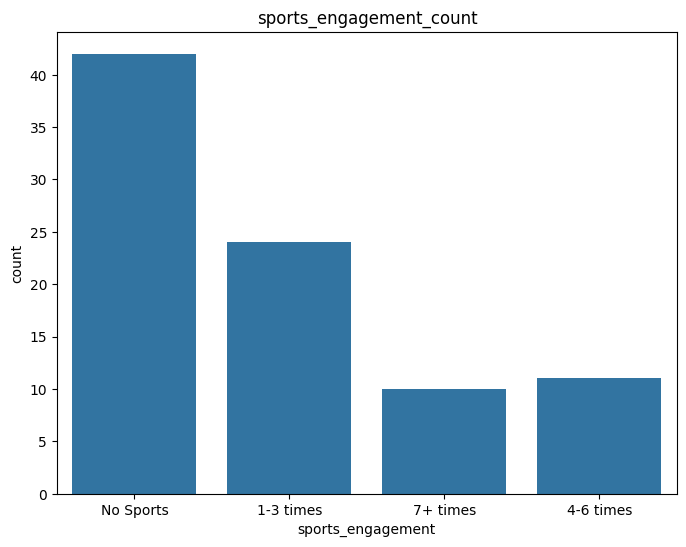

In [ ]:
plt.figure(figsize= (8,6))
sns.countplot(x='sports_engagement', data =df)
plt.title('sports_engagement_count')
plt.show()


# **07. Train ,Test & Split**

In [ ]:
target_column = 'academic_pressure'

if target_column in df.columns:
  X = df.drop(target_column, axis = 1)
  y = df[target_column]

else:
  raise KeyError(f"{target_column}not found is data frame")

X = X.apply(pd.to_numeric, errors = 'coerce')
X.fillna(0, inplace = True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# **08.  Regression Models**

# 08.1 Random Forest Regressor

In [ ]:
rf = RandomForestRegressor() #train the model
rf.fit(X_train,y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Regressor Summary : ")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred_rf)}")
print(f"r2 score: {r2_score(y_test,y_pred_rf)}")
print(f"parameters: {rf.get_params()}")

Random Forest Regressor Summary : 
Mean Squared Error (MSE): 1.0427777777777778
r2 score: 0.017848837209302193
parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


# 08.2 Decision Tree Regressor

In [ ]:
dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)
y_pred_dt =dt.predict(X_test)
print("Decision Tree Regressor : ")
print(f"Mean Squared Error (MSE) : {mean_squared_error(y_test, y_pred_dt)}")
print(f"r2 score: {r2_score(y_test,y_pred_dt)}")
print(f"parameters : {dt.get_params()}")

Decision Tree Regressor : 
Mean Squared Error (MSE) : 2.2962962962962963
r2 score: -1.162790697674419
parameters : {'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}


# 08.3 Linear Regression

In [ ]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred_lr = lr.predict(X_test)
print("Linear Regression: ")
print(f"Mean Squared error (MSE): {mean_squared_error(y_test,y_pred_lr)}")
print(f"r2 score: {r2_score(y_test,y_pred_lr)}")
print(f"Parameters : {lr.get_params()}")
print(f"coefficient : {lr.coef_}")
print(f"intercept: {lr.intercept_}")

Linear Regression: 
Mean Squared error (MSE): 1.271807366463217
r2 score: -0.19786507771535566
Parameters : {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}
coefficient : [-6.07059698e-02 -3.27515792e-15 -6.66133815e-16 -2.66453526e-15
 -1.44328993e-15 -5.76742856e-03  5.00475050e-01  7.77020748e-01
 -7.98370401e-02  2.00823594e-01  8.92156800e-02  1.62721162e-02
  3.34557414e-01  1.53486085e-01  0.00000000e+00 -2.46039333e-01
  5.38070547e-02 -2.72635933e+00  2.17280277e-01 -4.34069123e-02
 -4.54548060e-01 -4.83109981e-01  1.05240211e+00 -4.64268906e-01
 -2.19885402e-01 -4.48171689e-01 -9.59320128e-01 -3.16328643e-03
 -3.14830872e-01 -9.08817349e-02]
intercept: 0.04645101915360961


# 08.4 Support Vector Regression

In [ ]:
svr = SVR()
svr.fit(X_train,y_train)
y_pred_svr = svr.predict(X_test)
print("Support Vector Regression Summary: ")
print(f"mean squared error (MSE) : {mean_squared_error(y_test,y_pred_svr)}")
print(f"r2 score : {r2_score(y_test,y_pred_svr)}")
print(f"Parameters : {svr.get_params()}")

Support Vector Regression Summary: 
mean squared error (MSE) : 0.9824974885160467
r2 score : 0.0746244584907001
Parameters : {'C': 1.0, 'cache_size': 200, 'coef0': 0.0, 'degree': 3, 'epsilon': 0.1, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'shrinking': True, 'tol': 0.001, 'verbose': False}


# **09. Classification Models**

In [ ]:
df['academic_pressure_category'] = pd.cut(df['academic_pressure'], bins=[0, 3, 6, 10], labels=['load', 'medium', 'high'])

#Update feature set and target variable for classification
X_class = df.drop(['academic_pressure','academic_pressure_category'], axis=1)
y_class = df['academic_pressure_category']

X_class = X_class.apply(pd.to_numeric, errors ='coerce')
X_class.fillna(0,inplace = True)

X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size = 0.3, random_state = 42)


# 09.1 Random Forest Clasasifier

In [ ]:
clf_rf = RandomForestClassifier()
clf_rf.fit(X_train_class, y_train_class)
y_pred_rf_class = clf_rf.predict(X_test_class)

print("Random Forest Classifier Summary: ")
print(f"Accuracy : {accuracy_score(y_test_class, y_pred_rf_class)}")
print("Classification Report : ")
print(classification_report(y_test_class, y_pred_rf_class))
print(f"Parameters : {clf_rf.get_params()}")



Random Forest Classifier Summary: 
Accuracy : 0.6666666666666666
Classification Report : 
              precision    recall  f1-score   support

        load       0.20      0.17      0.18         6
      medium       0.77      0.81      0.79        21

    accuracy                           0.67        27
   macro avg       0.49      0.49      0.49        27
weighted avg       0.65      0.67      0.66        27

Parameters : {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


# 09.2 Decision Tree Classification

In [ ]:
clf_dt = DecisionTreeClassifier()
clf_dt.fit(X_train_class, y_train_class)
y_pred_dt_class = clf_dt.predict(X_test_class)

print("Decision Tree Classifier Summary :")
print(f"Accuracy : {accuracy_score(y_test_class, y_pred_dt_class)}")
print("Classification Report : ")
print(classification_report(y_test_class, y_pred_dt_class))
print(f"Parameter : {clf_dt.get_params()}")


Decision Tree Classifier Summary :
Accuracy : 0.5555555555555556
Classification Report : 
              precision    recall  f1-score   support

        load       0.25      0.50      0.33         6
      medium       0.80      0.57      0.67        21

    accuracy                           0.56        27
   macro avg       0.53      0.54      0.50        27
weighted avg       0.68      0.56      0.59        27

Parameter : {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}


# **10. Clustering (K-Means)**

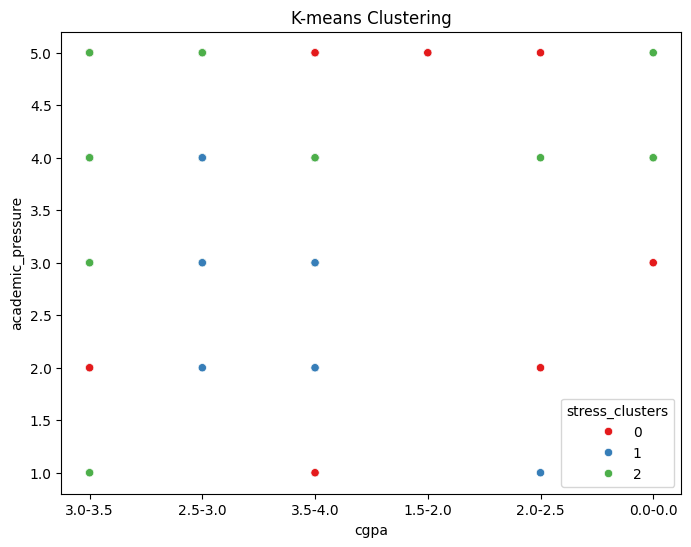

In [ ]:
k_means = KMeans(n_clusters =3, n_init = 10)
df['stress_clusters'] = k_means.fit_predict(X_class)

#visualization(use plot)
plt.figure(figsize = (8,6))
sns.scatterplot(x = 'cgpa', y= 'academic_pressure', hue = 'stress_clusters', data= df, palette ='Set1')
plt.title("K-means Clustering")
plt.show()



# **11. Model Evaluation**

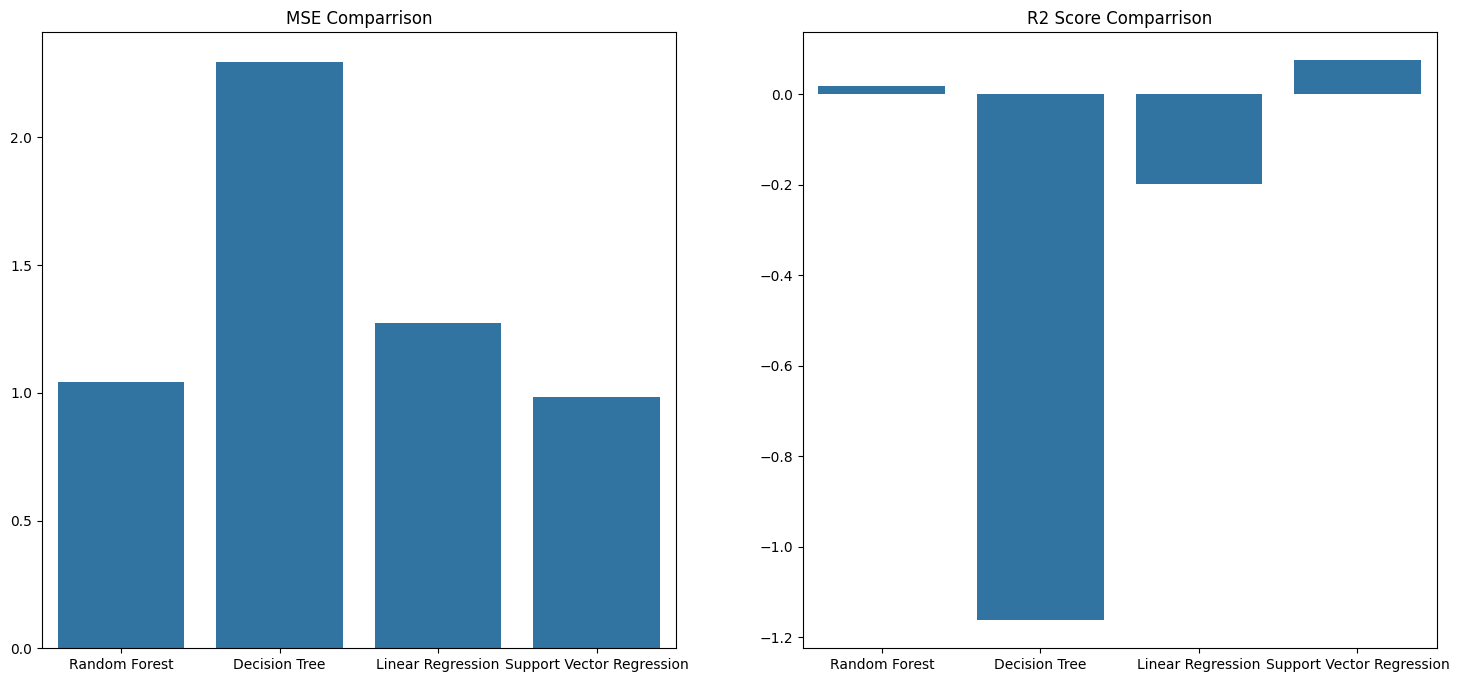

In [ ]:
if y_test.dtype in [np.float64,np.int64]:
  models = ['Random Forest', 'Decision Tree', 'Linear Regression', 'Support Vector Regression']
  mse_values = [
      mean_squared_error(y_test, y_pred_rf),
      mean_squared_error(y_test, y_pred_dt),
      mean_squared_error(y_test, y_pred_lr),
      mean_squared_error(y_test, y_pred_svr)
  ]

  r2_values = [
      r2_score(y_test, y_pred_rf),
      r2_score(y_test, y_pred_dt),
      r2_score(y_test, y_pred_lr),
      r2_score(y_test, y_pred_svr)
      ]

  #MSE eka bar chart ekkin display karayi
  plt.figure(figsize = (18,8))
  plt.subplot(1,2,1)
  sns.barplot(x = models, y = mse_values)
  plt.title("MSE Comparrison")

  #r2 score eka bar chart ekkin display karayi
  plt.subplot(1,2,2)
  sns.barplot(x = models, y = r2_values)
  plt.title("R2 Score Comparrison")
  plt.show()

else:
  models = ['Random Forest Classifier','Decision Tree Classifier']
  accuracies = [
      accuracy_score(y_test_class, y_pred_rf_class),
      accuracy_score(y_test_class,y_pred_dt_class)
  ]

  print('Random Forest Classifier Classification Report :')
  print(classification_report(y_test_class, y_pred_rf_class))
  print("Desicion Tree Classifier Classification Report : ")
  print(classification_report(y_test_class, y_pred_dt_class))

  plt.figure(figsize = (8,6))
  sns.barplot(x = models, y = accuracies)
  plt.titile("Accuracy Comparission")
  plt.show()





# **12. Save the model**

In [ ]:
model_file_name = 'StressPredictor.pkl'
joblib.dump(rf, model_file_name)

print(f"Model saved as: {model_file_name}")

Model saved as: StressPredictor.pkl
